In [1]:
import os
import numpy as np
from pathlib import Path
from PIL import Image as ImageBuilder, ImageOps
from PIL.Image import Image
import matplotlib.pyplot as plt

In [2]:
import math


source = "./data"

maxsize = (700, 700)

# функция что загружает фотографии из папки ./data
def load_images(source=source, maxsize=maxsize):
    images: list[Image] = []
    for path in Path(source).glob("*.jpg"):
        image = ImageBuilder.open(path)
        images.append(image)
        image.thumbnail(size=maxsize)
    return images

# отобразить фотографии построчно с m колонками
def show_images(images: list[Image], m = 3):
    n = math.ceil(len(images) / float(m))
    _, axes = plt.subplots(n, m, figsize=(12,12))
    
    if n == 1:
        for i, image in enumerate(images):
            axes[i].imshow(image)    
        return

    for i, image in enumerate(images):
        axes[i // m, i % m].imshow(image)

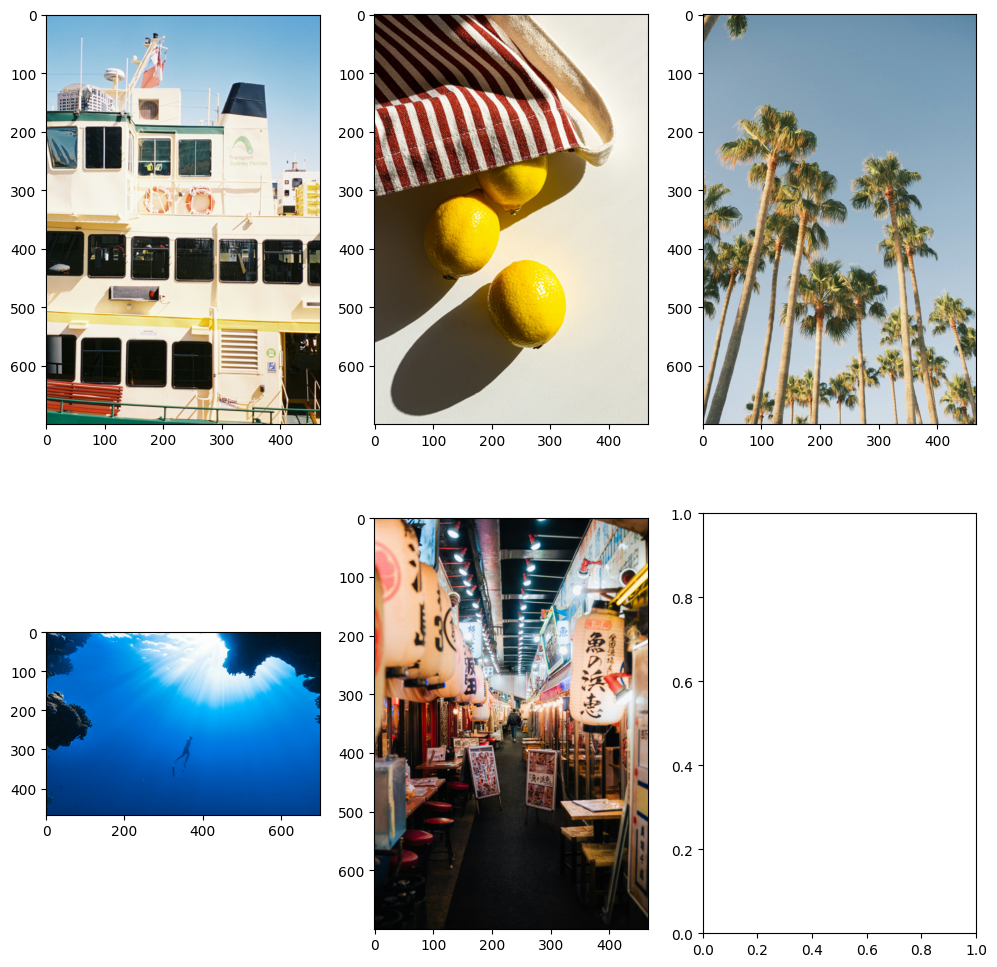

In [3]:
images = load_images()

show_images(images)

1. Получите условно серое изображение: выделив все 3 RGB-канала, получите результат их усреднения, а затем запишите его вместо каждого из
изначальных цветовых каналов. Выполните это для всех своих изображений.


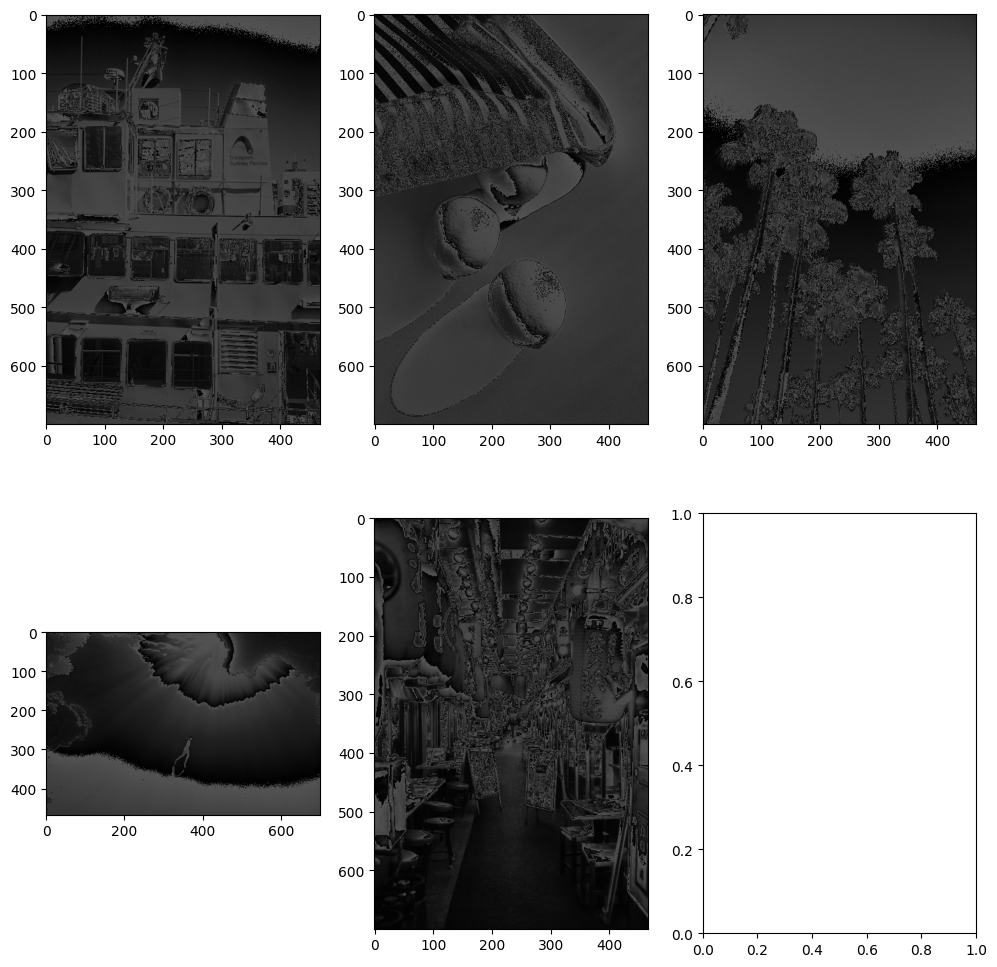

In [4]:
for i, image in enumerate(images):
    # разбить изображение по каналам
    r, g, b = image.split()
    
    # посчитать устредненную сумму элементов канала
    avg = ImageBuilder.fromarray((np.array(r) + np.array(g) + np.array(b)) // 3)
    
    # смержить каналы в изображение формата RGB
    images[i] = ImageBuilder.merge('RGB', (avg, avg, avg))
    
# в результате получаем черно-белые изображения
show_images(images)

In [5]:
images_gray1 = images

2. Получите Grayscale-изображения (в градациях серого) с использованием
формулы Y = 0.2126⋅ R + 0.7152⋅ G + 0.0722⋅ B, часто применяемой в
различных графических пакетах для такого преобразования. Здесь R, G и B
соответствуют красному, зеленому 

In [6]:
images = load_images()

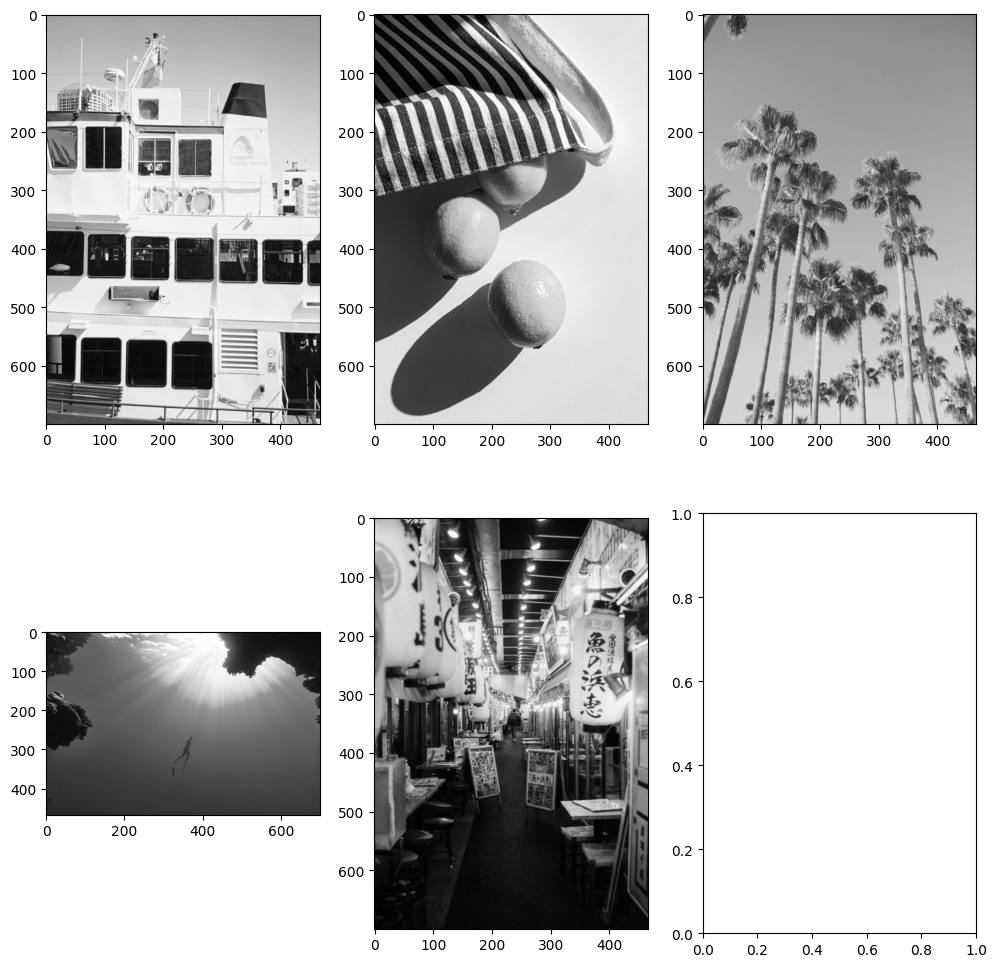

In [7]:
images_gray2 = []
for image in images:
    r, g, b = image.split()
    
    image_gray = image.copy()
    for i in range(image_gray.width):
      for j in range(image_gray.height):
        color = int(r.getpixel((i, j)) * 0.2126 + b.getpixel((i, j)) * 0.0722 + g.getpixel((i, j)) * 0.7152)
        image_gray.putpixel((i, j), (color,color,color))
    images_gray2.append(image_gray)

show_images(images_gray2)
    

3. Получите Grayscale-изображения (в градациях серого) с использованием
метода grayscale из модуля ImageOps 

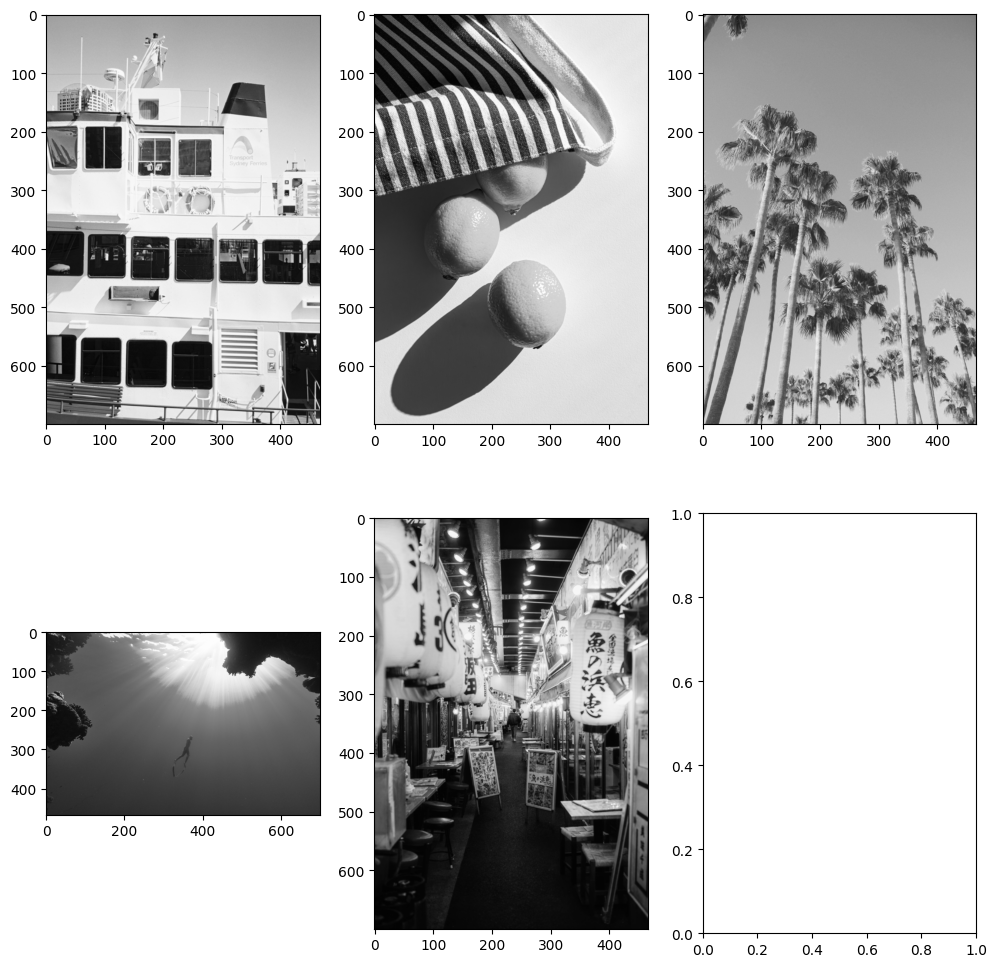

In [8]:
images_gray3 = []
for image in images:
    # используем библеотечную функцию для проброзования изображений в черно-белый формат
    img = ImageOps.grayscale(image)
    images_gray3.append(ImageBuilder.merge("RGB", (img, img, img)))
    
show_images(images_gray3)

4. Проанализируйте полученные изображения. Есть ли разница в картинках, полученных с помощью различных применённых 

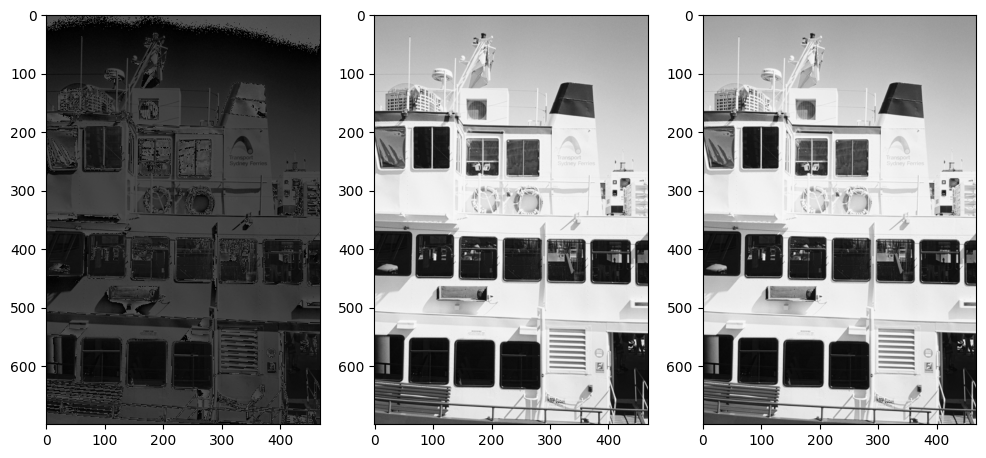

In [9]:
show_images([images_gray1[0], images_gray2[0], images_gray3[0]], 3)

# В результате видем большое различие между первым и двумя другими
# и не очень большие различия между двумя другими

5. Используя метод transpose, отразите свои изображения слева на право


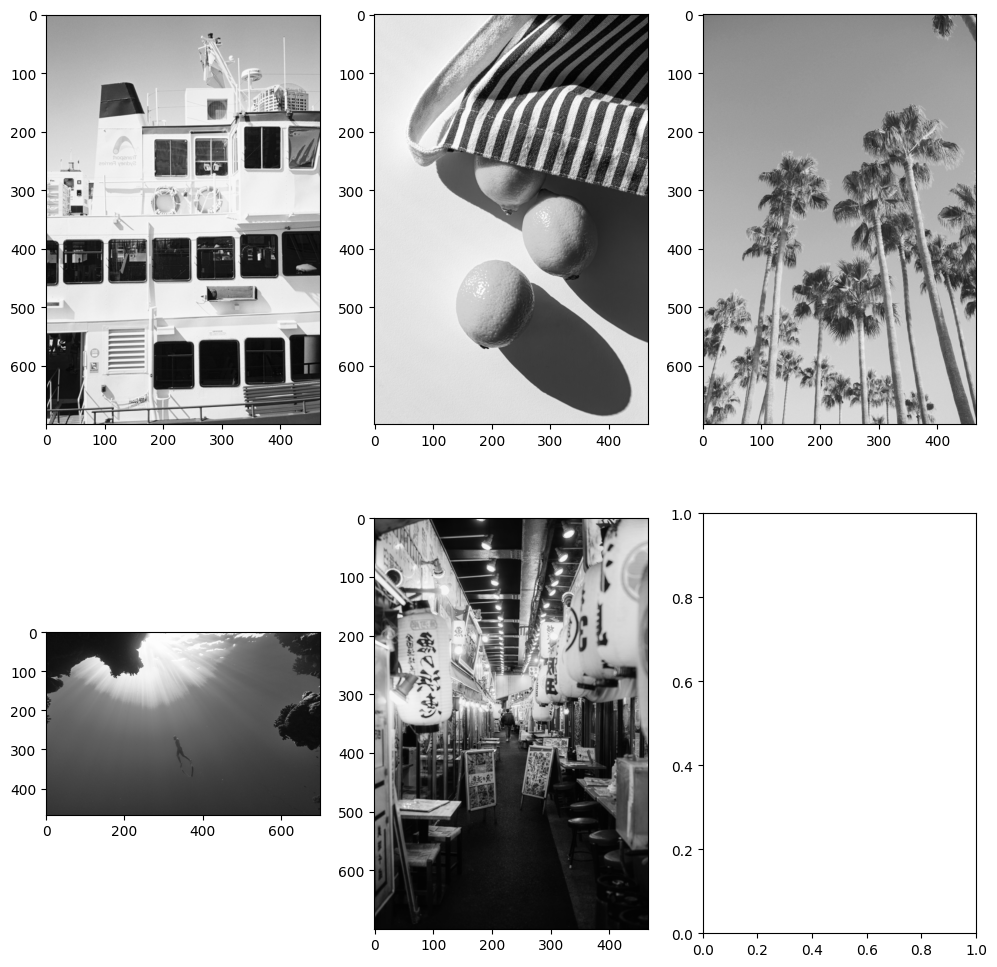

In [10]:
import random

transposed = [image.transpose(ImageBuilder.Transpose.FLIP_LEFT_RIGHT) for image in images_gray3]

show_images(transposed)